# CIFAR-10 with Keras


## Keras 
keras 是一種高階的深度學習工具，由python撰寫，可以使用少量的程式碼來建立深度學習的模型。  
keras 在使用上必須配合後端引擎，目前支援如Theano、CNTK和Tensorflow等，目前大多數keras應用都是Tensorflow backend的。  

## CIFAR-10

CIFAR的全名為Canadian Institute for Advanced Research，是由加拿大政府出資並由多位科學家、工程師收集而成的圖片資料庫。  
CIFAR-10由 60000張 32X32 的RGB彩色圖片構成，共10種分類，目前此數據用於競賽上，50000張為訓練資料，10000張為測試資料。  
![title](./pic.png)

keras提供整理好的CIFAR-10資料，只要透過import就可以拿到切好的training、testing資料。

Using TensorFlow backend.


Category: [6]


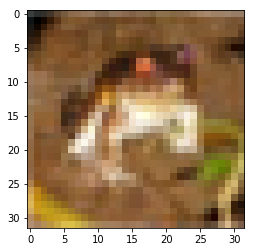

In [1]:
%matplotlib inline

import matplotlib
import keras
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

matplotlib.pyplot.imshow(x_train[0])
print('Category:', y_train[0])

## Keras Model 介紹

### Sequential Model
Sequential() 是keras中一種常用的model型態，宣告完Sequential()之後可以使用add()函數來將Layer按照順序加入model中，被加入的layer就會依照加入的順序被執行出來。

### Dense Layer 
Dense Layer 就是普通型態的一層神經網路，假設X是輸入資料，則Dense Layer會學習一組參數W和常數b，使得經過這層的輸出等於 W*X + b。  

### Convolution Layer 
Convolution Layer 是使用convolution來實作一層神經網路，有關於convolution的說明見以下網址。    
https://goo.gl/MDJbKt  
  
在影像、圖片應用上，Convolution的表現比普通Dense Layer更為優異。  

### MaxPooling
Pooling的機制是對眾多圖片的Pixel做篩選，篩選出分類器認為有用的局部特徵(feature)，篩選的機制有很多種，例如該Pixel在該範圍內的平均值、最大、最小值等等，在MaxPooling我們使用的是取局部最大值。

## DNN vs CNN
以下是兩個類神經網路在CIFAR-10資料上的實作，DNN神經網路如同tensorflow_mnist一樣只使用dense layer來學習cifar-10的圖片。但由於mnist的圖片是黑白且內容較簡單，而cifar-10為彩色且較多元的圖片，所以需要更為複雜的神經網路來做學習。  
依照以下的設定，DNN神經網路經過20輪訓練後可以到達約 40% validation_accracy，而CNN神經網路可以達到 50% validation_accuracy。  

請更改DNN或是CNN的架構內容來讓模型更精進，可以更改的方式為  
1. 更改參數內容  
    epochs: 訓練幾輪  
    batch_size: 每一個step訓練所使用的資料數量  
    learning_rate: 學習的精細度  
2. 增加神經網路層數
3. 更改神經元數量

### DNN神經網路

In [2]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

x_tr_dnn = x_train[:10000].astype('float32')
x_te_dnn = x_test.astype('float32')

x_tr_dnn = x_tr_dnn.reshape(-1, 3072)
x_te_dnn = x_te_dnn.reshape(-1, 3072)

x_tr_dnn /= 255
x_te_dnn /= 255

y_tr_dnn = to_categorical(y_train[:10000], num_classes=10)
y_te_dnn = to_categorical(y_test, num_classes=10)

#---------------------參數-----------------------------#

epochs = 20
batch_size = 128 
learning_rate = 0.001

#------------------------------------------------------#

#宣告Sequential model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(3072,)))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(x_tr_dnn, y_tr_dnn, batch_size=batch_size, epochs=epochs, shuffle=True, validation_data=(x_te_dnn, y_te_dnn))

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 1s 65us/step - loss: 2.1497 - acc: 0.2313 - val_loss: 1.9625 - val_acc: 0.2937
Epoch 2/20
10000/10000 [==============================] - 1s 53us/step - loss: 1.9202 - acc: 0.3213 - val_loss: 1.9205 - val_acc: 0.3141
Epoch 3/20
10000/10000 [==============================] - 1s 52us/step - loss: 1.8478 - acc: 0.3513 - val_loss: 1.9064 - val_acc: 0.3112
Epoch 4/20
10000/10000 [==============================] - 1s 50us/step - loss: 1.8037 - acc: 0.3645 - val_loss: 1.8145 - val_acc: 0.3558
Epoch 5/20
10000/10000 [==============================] - 1s 51us/step - loss: 1.7615 - acc: 0.3783 - val_loss: 1.8310 - val_acc: 0.3518
Epoch 6/20
10000/10000 [==============================] - 1s 51us/step - loss: 1.7266 - acc: 0.3926 - val_loss: 1.7837 - val_acc: 0.3695
Epoch 7/20
10000/10000 [==============================] - 1s 51us/step - loss: 1.7123 - acc: 0.3954 - val_loss: 1.7537 - val_acc

### CNN神經網路

In [3]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

x_tr_cnn = x_train[:10000].astype('float32')
x_te_cnn = x_test.astype('float32')

x_tr_cnn /= 255
x_te_cnn /= 255

y_tr_cnn = to_categorical(y_train[:10000], num_classes=10)
y_te_cnn = to_categorical(y_test, num_classes=10)

#---------------------參數-----------------------------#

epochs = 20
batch_size = 128 
learning_rate = 0.001

#------------------------------------------------------#


#宣告Sequential model
model = Sequential()

# 一層一層加入Layer
# Conv2D的宣告方式為 Conv2D(神經元數量, (Filter size))
# keras規定第一層需要宣告input data的size，而CIFAR-10的size為(32, 32, 3)
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))
#model.add(MaxPooling2D((2, 2)))

#------------------------------------------------------#

#--------------請多加幾層 Conv2D or Pooling-------------#

#------------------------------------------------------#

model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(x_tr_cnn, y_tr_cnn, batch_size=batch_size, epochs=epochs, shuffle=True, validation_data=(x_te_cnn, y_te_cnn))

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 5s 539us/step - loss: 2.0717 - acc: 0.2981 - val_loss: 1.7366 - val_acc: 0.3764
Epoch 2/20
10000/10000 [==============================] - 5s 518us/step - loss: 1.5755 - acc: 0.4595 - val_loss: 1.5780 - val_acc: 0.4488
Epoch 3/20
10000/10000 [==============================] - 5s 519us/step - loss: 1.3898 - acc: 0.5234 - val_loss: 1.4887 - val_acc: 0.4756
Epoch 4/20
10000/10000 [==============================] - 5s 527us/step - loss: 1.2727 - acc: 0.5658 - val_loss: 1.4390 - val_acc: 0.4925
Epoch 5/20
10000/10000 [==============================] - 5s 524us/step - loss: 1.1770 - acc: 0.5979 - val_loss: 1.4038 - val_acc: 0.5067
Epoch 6/20
10000/10000 [==============================] - 5s 525us/step - loss: 1.0991 - acc: 0.6275 - val_loss: 1.4087 - val_acc: 0.5033
Epoch 7/20
10000/10000 [==============================] - 5s 526us/step - loss: 1.0577 - acc: 0.6393 - val_loss: 1.4195 - 